In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

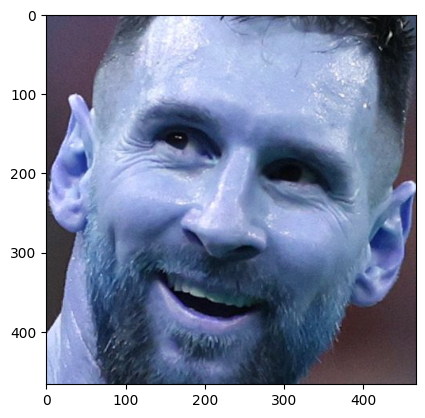

In [3]:
org_image_obstructed = cv2.imread('data set\cropped\lionel_messi\lionel_messi39.png')
plt.imshow(org_image_obstructed)

In [4]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

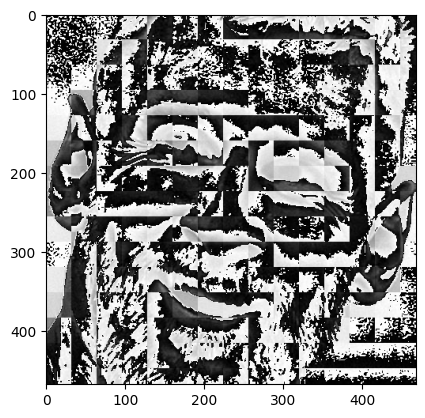

In [5]:
im_har = w2d(org_image_obstructed,'db1',5)
plt.imshow(im_har, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('OpenCV\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('OpenCV\haarcascade_eye.xml')

In [7]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [8]:
path_to_data = "./data set/"
path_to_cr_data = "./data set/cropped/"

In [9]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [10]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [11]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        try:
            path=entry.path.replace("\\","/")
            roi_color = get_cropped_image_if_2_eyes(path)
        except Exception as e: 
            print('Issue with image {}'.format(path))    
       
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
lionel_messi
Generating cropped images in folder:  ./data set/cropped/lionel_messi
Issue with image ./data set/lionel_messi/2024-copa-america-argentina-mens-soccer-team-1-6952548-17201.jpg
Issue with image ./data set/lionel_messi/230525112408-lionel-messi-0521.jpg
Issue with image ./data set/lionel_messi/230609115559-01-lionel-messi-inter-miami-messi.jpg
Issue with image ./data set/lionel_messi/gettyimages-2068694733.jpg
Issue with image ./data set/lionel_messi/Lionel-Messi-014.jpg
Issue with image ./data set/lionel_messi/PT2MIEAWXNCDFMFEBMJBDNMUFY.jpg
Issue with image ./data set/lionel_messi/Rosen-Messi-Miami.jpg
maria_sharapova
Generating cropped images in folder:  ./data set/cropped/maria_sharapova
Issue with image ./data set/maria_sharapova/220420085725-sharapova-fiance.jpg
Issue with image ./data set/maria_sharapova/24px.svg
Issue with image ./data set/maria_sharapova/3268.jpg
Issue with image ./data set/maria_sharapova/449612414_1663669470844966_7535582105464858267_n.jpg


In [35]:
cropped_image_dirs

['./data set/cropped/lionel_messi',
 './data set/cropped/maria_sharapova',
 './data set/cropped/roger_federer',
 './data set/cropped/serena_williams']

In [36]:
celebrity_file_names_dict

{'lionel_messi': ['./data set/cropped/lionel_messi\\lionel_messi1.png',
  './data set/cropped/lionel_messi\\lionel_messi10.png',
  './data set/cropped/lionel_messi\\lionel_messi11.png',
  './data set/cropped/lionel_messi\\lionel_messi12.png',
  './data set/cropped/lionel_messi\\lionel_messi13.png',
  './data set/cropped/lionel_messi\\lionel_messi14.png',
  './data set/cropped/lionel_messi\\lionel_messi15.png',
  './data set/cropped/lionel_messi\\lionel_messi17.png',
  './data set/cropped/lionel_messi\\lionel_messi19.png',
  './data set/cropped/lionel_messi\\lionel_messi2.png',
  './data set/cropped/lionel_messi\\lionel_messi20.png',
  './data set/cropped/lionel_messi\\lionel_messi21.png',
  './data set/cropped/lionel_messi\\lionel_messi22.png',
  './data set/cropped/lionel_messi\\lionel_messi23.png',
  './data set/cropped/lionel_messi\\lionel_messi24.png',
  './data set/cropped/lionel_messi\\lionel_messi25.png',
  './data set/cropped/lionel_messi\\lionel_messi26.png',
  './data set/cro

In [37]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./data set/cropped/lionel_messi\\lionel_messi1.png',
  './data set/cropped/lionel_messi\\lionel_messi10.png',
  './data set/cropped/lionel_messi\\lionel_messi11.png',
  './data set/cropped/lionel_messi\\lionel_messi12.png',
  './data set/cropped/lionel_messi\\lionel_messi13.png',
  './data set/cropped/lionel_messi\\lionel_messi14.png',
  './data set/cropped/lionel_messi\\lionel_messi15.png',
  './data set/cropped/lionel_messi\\lionel_messi17.png',
  './data set/cropped/lionel_messi\\lionel_messi2.png',
  './data set/cropped/lionel_messi\\lionel_messi20.png',
  './data set/cropped/lionel_messi\\lionel_messi21.png',
  './data set/cropped/lionel_messi\\lionel_messi22.png',
  './data set/cropped/lionel_messi\\lionel_messi23.png',
  './data set/cropped/lionel_messi\\lionel_messi24.png',
  './data set/cropped/lionel_messi\\lionel_messi25.png',
  './data set/cropped/lionel_messi\\lionel_messi26.png',
  './data set/cropped/lionel_messi\\lionel_messi27.png',
  './data set/cro

In [38]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3}

In [39]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     
        
      

In [40]:
len(X[0])

4096

In [41]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(151, 4096)

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8947368421052632

In [47]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.83      0.94      0.88        16
           2       1.00      0.75      0.86         4
           3       0.80      0.80      0.80         5

    accuracy                           0.89        38
   macro avg       0.91      0.85      0.87        38
weighted avg       0.90      0.89      0.90        38



In [53]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [54]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.787747,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.681818,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.806324,{'logisticregression__C': 1}


In [55]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [56]:
best_estimators['svm'].score(X_test,y_test)

0.8947368421052632

In [57]:
best_estimators['random_forest'].score(X_test,y_test)

0.7894736842105263

In [58]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8947368421052632

In [59]:
best_clf = best_estimators['svm']

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  1,  0,  0],
       [ 0, 15,  0,  1],
       [ 1,  1,  2,  0],
       [ 0,  0,  0,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

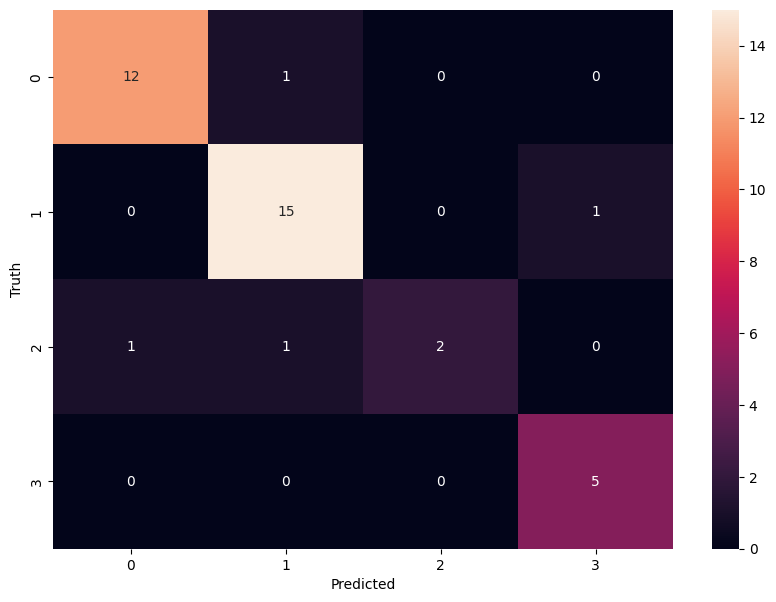

In [61]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [63]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))